In [2]:
import numpy as np
import corner
import matplotlib.pyplot as plt
import pickle
import json

In [3]:
with open("/home/joseph.bayley/public_html/CBC/vitmain_O4MDC/U1_1024_1s_dynesty/test_dynesty1/1024Hz_full_15par_2det_widespin_0_samples.dat","r") as f:
    columns = f.readline()
    samples = np.loadtxt(f)

In [4]:
pars = ["mass_1","mass_2","luminosity_distance","geocent_time","theta_jn","psi","a_1","a_2","tilt_1","tilt_2","phi_12","phi_jl","ra","dec"]

In [5]:
with open("/home/joseph.bayley/data/CBC/O4MDC/michael_posterior/DEV0_pesummary.dat","r") as f:
    m_columns = f.readline()
    m_samples_t = np.loadtxt(f)
    
inds = []                                                                                                                                                  
for par in pars:                                                                                                                                           
    for ind,allp in enumerate(m_columns.strip("\n").split("\t")):                                                                                       
        if par == allp:                                                                                                                                    
            inds.append(ind)                                                                                                                               
            break
            
m_samples = []                                                                                                                                            
for ind in range(len(m_samples_t)):                                                                                                                      
                                                                                                                                                               
    temp_samp = np.array(m_samples_t[ind][inds])                                                                 
    m_samples.append(temp_samp)  

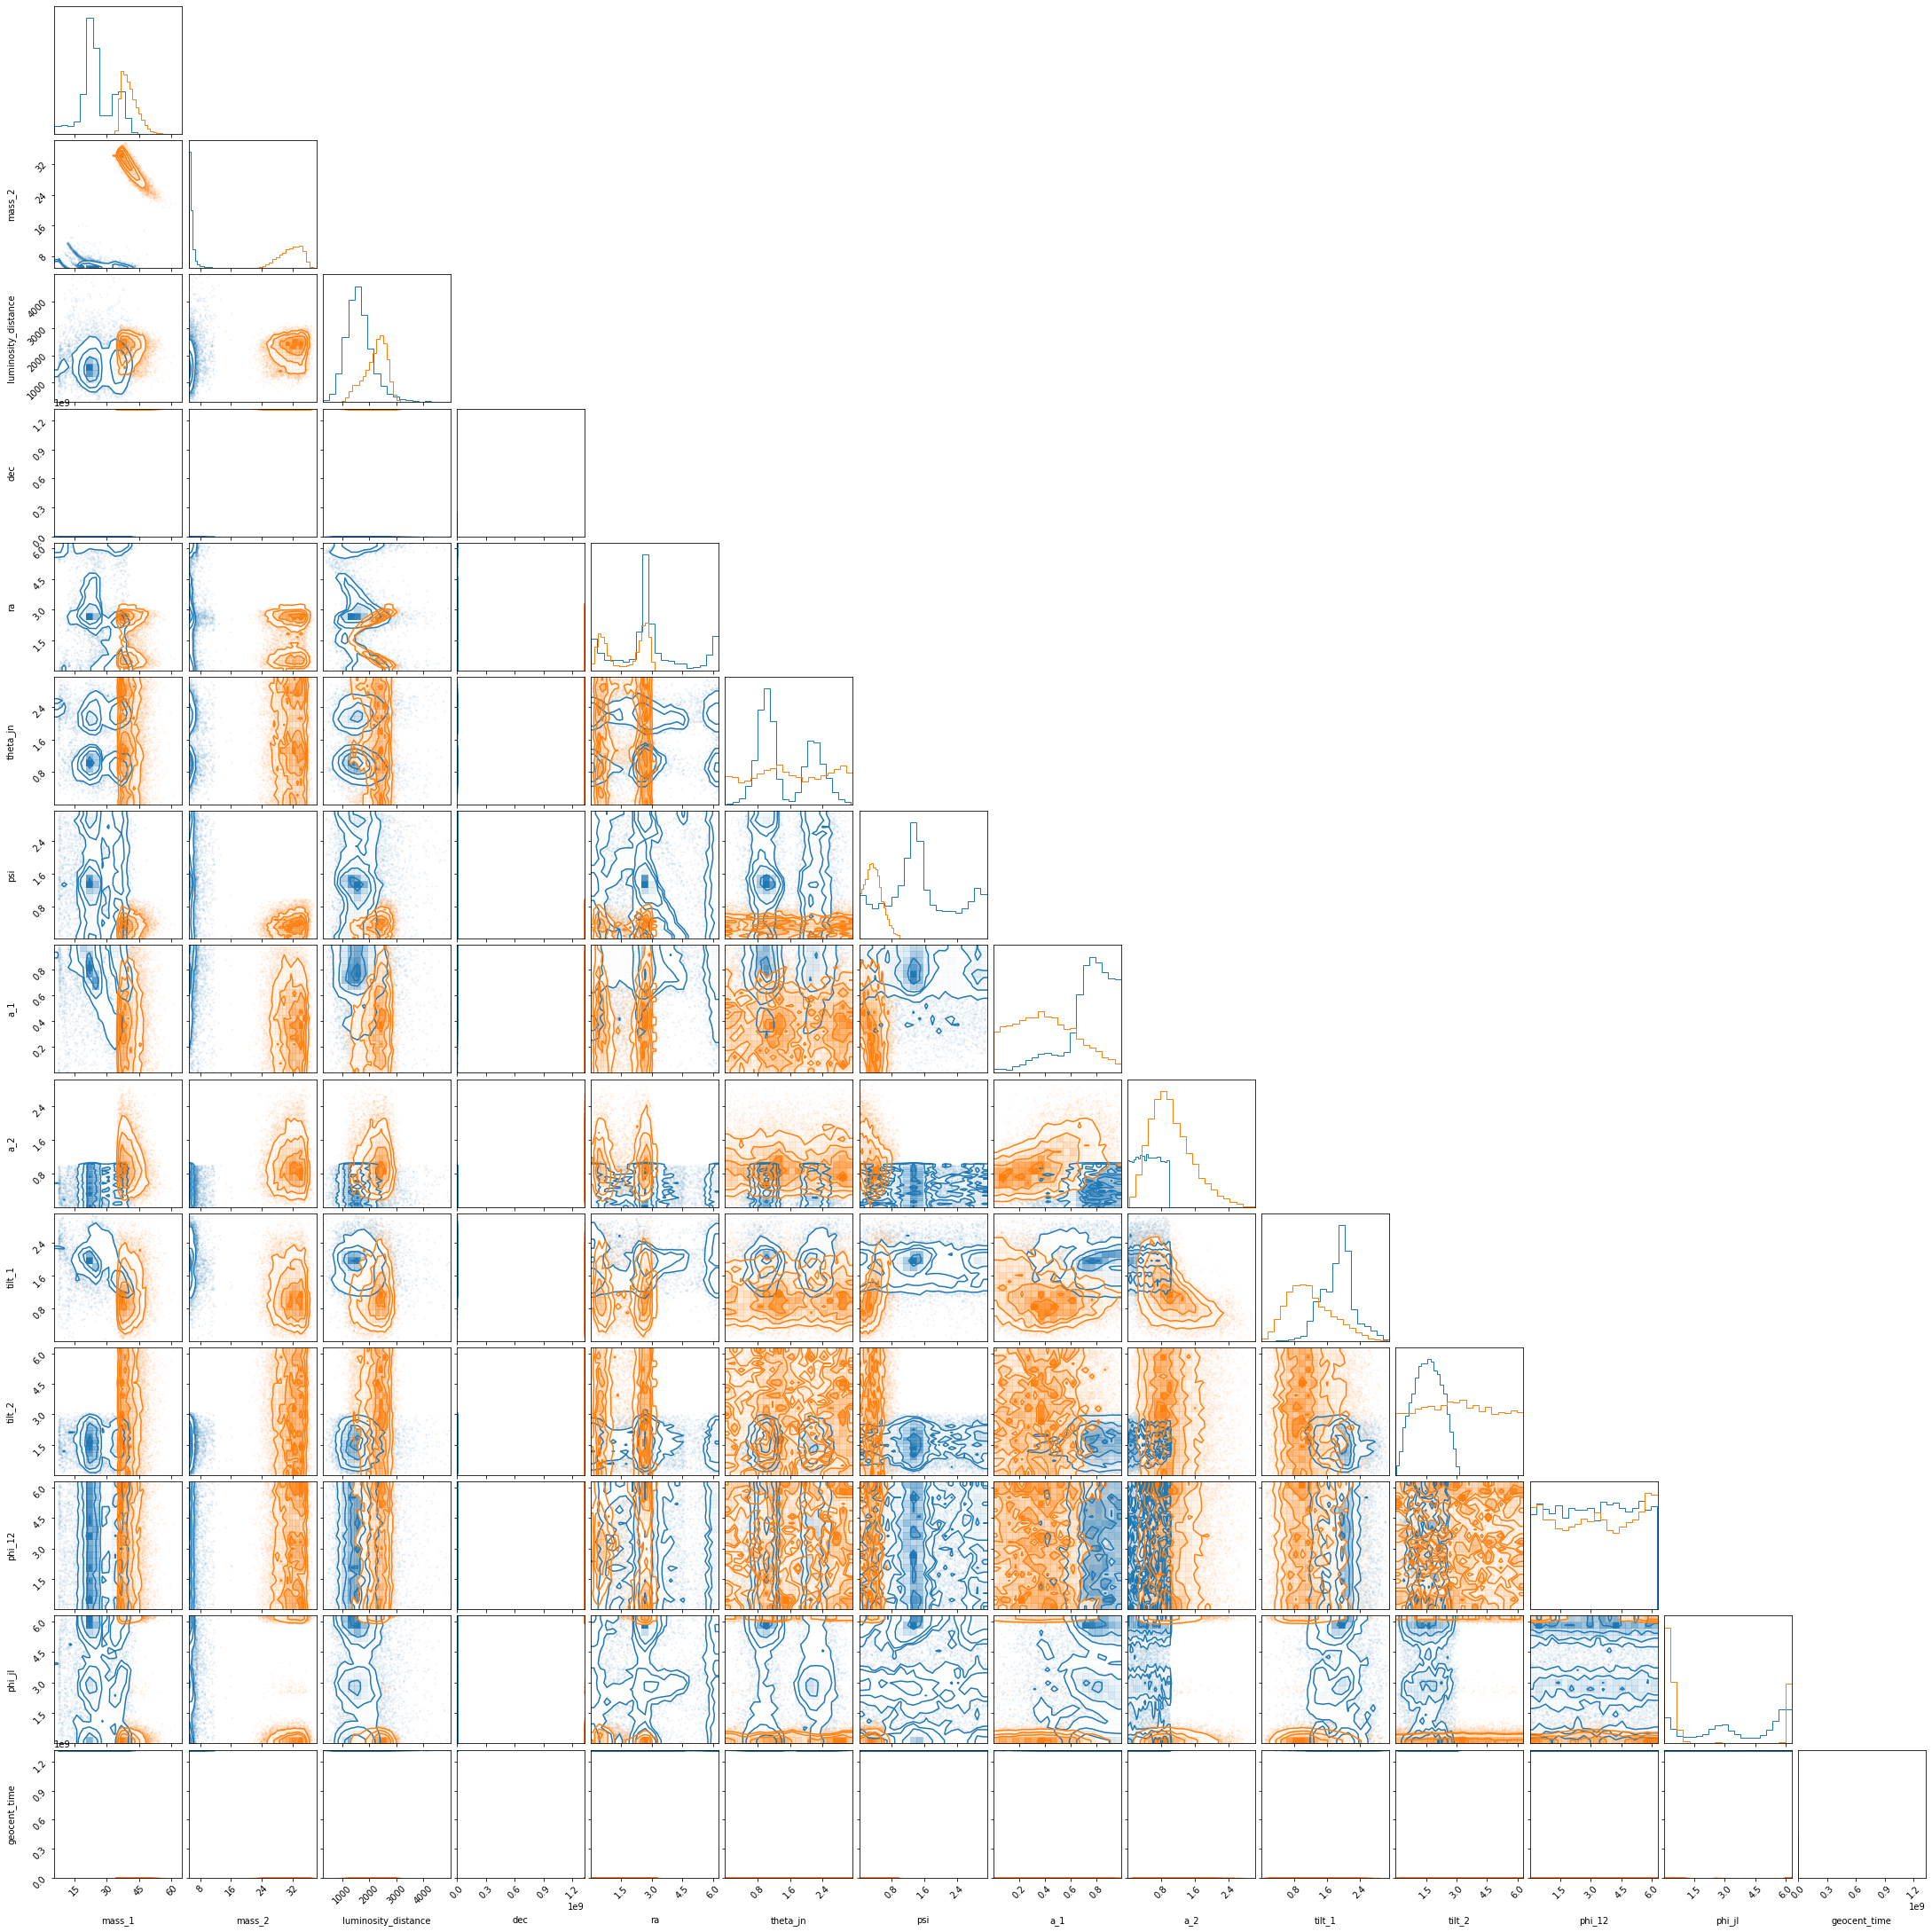

In [6]:
fg1 = corner.corner(samples, labels= columns.split(), color="C0")
fg1 = corner.corner(np.array(m_samples), fig=fg1, color="C1")

In [34]:
with open("/home/joseph.bayley/data/CBC/O4MDC/o4_online/U1/meta.json", "rb") as f:
    meta = json.load(f)

In [35]:
meta

{'args': {'outdir': 'U1',
  'asd_dict': '{H1: asd_files/aLIGO_O4_high_asd.txt, L1: asd_files/aLIGO_O4_high_asd.txt}',
  'population': 'populations/GW150914-like.prior',
  'waveform': 'IMRPhenomXPHM',
  'source': 'bbh',
  'seed': 42,
  'blind': False,
  'plot': True},
 'sim_version': '(CLEAN) 5ca7e52 2021-04-29 07:28:51 -0700\n',
 'trigger': {'geocent': 1325030418.015282, 'chirp_mass': 30.704285838459498},
 'H1': {'psd_file': None,
  'asd_file': 'asd_files/aLIGO_O4_high_asd.txt',
  'channel': 'H1:O4MDC',
  'filename': 'U1/H1-O4MDC-1325029266-1184.gwf',
  'optimal_SNR_abs': 12.747043295420248,
  'matched_filter_SNR_abs': 12.965454643716262},
 'L1': {'psd_file': None,
  'asd_file': 'asd_files/aLIGO_O4_high_asd.txt',
  'channel': 'L1:O4MDC',
  'filename': 'U1/L1-O4MDC-1325029266-1184.gwf',
  'optimal_SNR_abs': 14.561834286819403,
  'matched_filter_SNR_abs': 15.981445953842469},
 'injection': {'mass_ratio': 0.8749080237694725,
  'chirp_mass': 30.704285838459494,
  'a_1': 0.21959818254342153